In [1]:
import numpy as np
import sqlite3 as sq
import matplotlib.pyplot as plt
import pandas as pd

from colors import Colors

%matplotlib inline

In [2]:
connection = sq.connect("./measurements.db")
connection.row_factory = sq.Row

In [3]:
def average(items, key):
    total = 0
    for item in items:
        try:
            total += item[key]
        except:
            pass
    return total/len(items)

def getUDP():
    sql = """
    SELECT * FROM dns_measurements measurement
    WHERE measurement.protocol = 'udp' AND measurement.r_code IS NOT NULL AND measurement.total_time IS NOT NULL AND measurement.total_time <= 5000000000
      AND NOT measurement.cache_warming
      AND measurement.ip IN (SELECT ip FROM dns_measurements tcp WHERE tcp.protocol = 'tcp' AND tcp.response_ip IS NOT NULL AND NOT tcp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tls WHERE tls.protocol = 'tls' AND tls.response_ip IS NOT NULL AND NOT tls.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements https WHERE https.protocol = 'https' AND https.response_ip IS NOT NULL AND NOT https.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements quic WHERE quic.protocol = 'quic' AND quic.response_ip IS NOT NULL AND NOT quic.cache_warming);
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getTCP():
    sql = """
    SELECT * FROM dns_measurements measurement
    WHERE measurement.protocol = 'tcp' AND measurement.r_code IS NOT NULL AND measurement.total_time IS NOT NULL AND measurement.total_time <= 5000000000
      AND NOT measurement.cache_warming
      AND measurement.ip IN (SELECT ip FROM dns_measurements udp WHERE udp.protocol = 'udp' AND udp.response_ip IS NOT NULL AND NOT udp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tls WHERE tls.protocol = 'tls' AND tls.response_ip IS NOT NULL AND NOT tls.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements https WHERE https.protocol = 'https' AND https.response_ip IS NOT NULL AND NOT https.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements quic WHERE quic.protocol = 'quic' AND quic.response_ip IS NOT NULL AND NOT quic.cache_warming);
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getTLS():
    sql = """
    SELECT * FROM dns_measurements measurement
    WHERE measurement.protocol = 'tls' AND measurement.r_code IS NOT NULL AND measurement.total_time IS NOT NULL AND measurement.total_time <= 5000000000
      AND NOT measurement.cache_warming
      AND measurement.ip IN (SELECT ip FROM dns_measurements udp WHERE udp.protocol = 'udp' AND udp.response_ip IS NOT NULL AND NOT udp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tcp WHERE tcp.protocol = 'tcp' AND tcp.response_ip IS NOT NULL AND NOT tcp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements https WHERE https.protocol = 'https' AND https.response_ip IS NOT NULL AND NOT https.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements quic WHERE quic.protocol = 'quic' AND quic.response_ip IS NOT NULL AND NOT quic.cache_warming);
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getHTTPS():
    sql = """
    SELECT * FROM dns_measurements measurement
    WHERE measurement.protocol = 'https' AND measurement.r_code IS NOT NULL AND measurement.total_time IS NOT NULL AND measurement.total_time <= 5000000000
      AND NOT measurement.cache_warming
      AND measurement.ip IN (SELECT ip FROM dns_measurements udp WHERE udp.protocol = 'udp' AND udp.response_ip IS NOT NULL AND NOT udp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tcp WHERE tcp.protocol = 'tcp' AND tcp.response_ip IS NOT NULL AND NOT tcp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tls WHERE tls.protocol = 'tls' AND tls.response_ip IS NOT NULL AND NOT tls.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements quic WHERE quic.protocol = 'quic' AND quic.response_ip IS NOT NULL AND NOT quic.cache_warming);
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getQUIC():
    sql = """
    SELECT * FROM dns_measurements measurement
    WHERE measurement.protocol = 'quic' AND measurement.r_code IS NOT NULL AND measurement.total_time IS NOT NULL AND measurement.total_time <= 5000000000
      AND NOT measurement.cache_warming
      AND measurement.ip IN (SELECT ip FROM dns_measurements udp WHERE udp.protocol = 'udp' AND udp.response_ip IS NOT NULL AND NOT udp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tcp WHERE tcp.protocol = 'tcp' AND tcp.response_ip IS NOT NULL AND NOT tcp.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements tls WHERE tls.protocol = 'tls' AND tls.response_ip IS NOT NULL AND NOT tls.cache_warming)
      AND measurement.ip IN (SELECT ip FROM dns_measurements https WHERE https.protocol = 'https' AND https.response_ip IS NOT NULL AND NOT https.cache_warming);
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getQUICNegotiatedProtocol():
    sql = """
    SELECT DISTINCT(measurement.ip), measurement.q_ui_c_negotiated_protocol FROM dns_measurements measurement
    WHERE measurement.protocol = 'quic' AND measurement.r_code IS NOT NULL
    AND NOT measurement.cache_warming;
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getQUICVersions():
    sql = """
    SELECT DISTINCT(measurement.ip), measurement.q_ui_c_version FROM dns_measurements measurement
    WHERE measurement.protocol = 'quic' AND measurement.r_code IS NOT NULL
    AND NOT measurement.cache_warming;
    """
    cursor = connection.cursor()
    cursor.execute(sql)
    items = list(cursor.fetchall())
    cursor.close()
    return items

def getNumberOfSamples():
    udp = len(getUDP())
    tcp = len(getTCP())
    tls = len(getTLS())
    https = len(getHTTPS())
    quic = len(getQUIC())
    return pd.DataFrame({ 
        "Protocol": ["UDP", "TCP", "TLS", "HTTPS", "QUIC"],
        "Samples": [udp, tcp, tls, https, quic]
    })

### Average Total Times

In [4]:
print(average(getUDP(), "total_time") / 1000000)
print(average(getTCP(), "total_time") / 1000000)
print(average(getTLS(), "total_time") / 1000000)
print(average(getHTTPS(), "total_time") / 1000000)
print(average(getQUIC(), "total_time") / 1000000)

133.4439886622728
267.1019443489733
411.24129024031475
405.6914702318508
454.0950133090439


In [5]:
print(getNumberOfSamples().to_markdown())

|    | Protocol   |   Samples |
|---:|:-----------|----------:|
|  0 | UDP        |     10014 |
|  1 | TCP        |     10081 |
|  2 | TLS        |      9912 |
|  3 | HTTPS      |     10028 |
|  4 | QUIC       |     11212 |


### Comparing Protocols

In [6]:
udp = getUDP()
tcp = getTCP()
tls = getTLS()
https = getHTTPS()
quic = getQUIC()

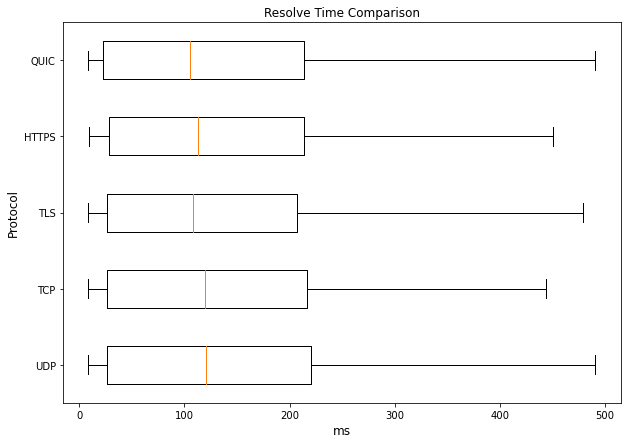

In [7]:
udpQueryTime = list(map(lambda x: x["query_time"] / 1000000, udp))
tcpQueryTime = list(map(lambda x: x["query_time"] / 1000000, tcp))
tlsQueryTime = list(map(lambda x: x["query_time"] / 1000000, tls))
httpsQueryTime = list(map(lambda x: x["query_time"] / 1000000, https))
quicQueryTime = list(map(lambda x: x["query_time"] / 1000000, quic))

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([udpQueryTime, tcpQueryTime, tlsQueryTime, httpsQueryTime, quicQueryTime], vert = 0, showfliers = False)

ax.set_yticklabels(["UDP", "TCP", "TLS", "HTTPS", "QUIC"])

ax.set_xlabel('ms', fontsize = 12)
ax.set_ylabel("Protocol", fontsize = 12)
plt.title("Resolve Time Comparison")

plt.show(bp)

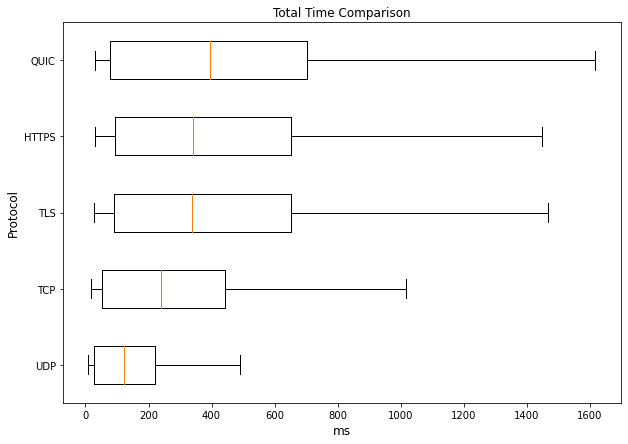

In [8]:
udpTotalTime = list(map(lambda x: x["total_time"] / 1000000, udp))
tcpTotalTime = list(map(lambda x: x["total_time"] / 1000000, tcp))
tlsTotalTime = list(map(lambda x: x["total_time"] / 1000000, tls))
httpsTotalTime = list(map(lambda x: x["total_time"] / 1000000, https))
quicTotalTime = list(map(lambda x: x["total_time"] / 1000000, quic))

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([udpTotalTime, tcpTotalTime, tlsTotalTime, httpsTotalTime, quicTotalTime], vert = 0, showfliers = False)

ax.set_yticklabels(["UDP", "TCP", "TLS", "HTTPS", "QUIC"])

ax.set_xlabel("ms", fontsize = 12)
ax.set_ylabel("Protocol", fontsize = 12)
plt.title("Total Time Comparison")

plt.show(bp)

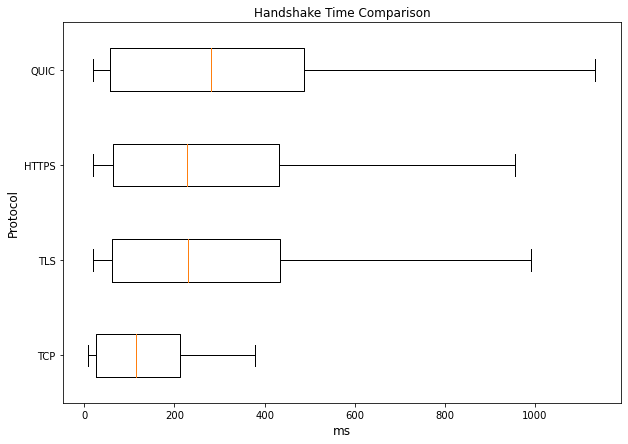

In [9]:
udpSetupTime = list(map(lambda x: x["udp_socket_setup_duration"] / 1000000, udp))
tcpSetupTime = list(map(lambda x: x["tcp_handshake_duration"] / 1000000, tcp))
tlsSetupTime = list(map(lambda x: (x["tcp_handshake_duration"] + x["tls_handshake_duration"]) / 1000000, tls))
httpsSetupTime = list(map(lambda x: (x["tcp_handshake_duration"] + x["tls_handshake_duration"]) / 1000000, https))
quicSetupTime = list(map(lambda x: x["q_ui_c_handshake_duration"] / 1000000, quic))

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([tcpSetupTime, tlsSetupTime, httpsSetupTime, quicSetupTime], vert = 0, showfliers = False)

ax.set_yticklabels(["TCP", "TLS", "HTTPS", "QUIC"])

ax.set_xlabel("ms", fontsize = 12)
ax.set_ylabel("Protocol", fontsize = 12)
plt.title("Handshake Time Comparison")

plt.show(bp)

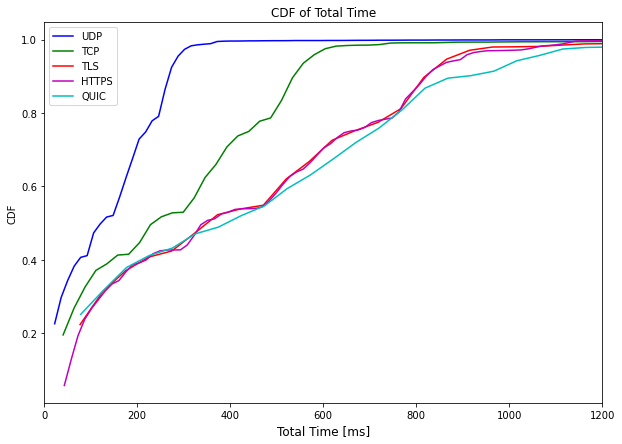

In [10]:
def calculateCDF(items):
    count, bins_count = np.histogram(items, bins=100)

    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    return bins_count[1:], cdf

fig = plt.figure(figsize = (10, 7))
plt.plot(calculateCDF(udpTotalTime)[0], calculateCDF(udpTotalTime)[1], label="UDP", color = Colors.udp)
plt.plot(calculateCDF(tcpTotalTime)[0], calculateCDF(tcpTotalTime)[1], label="TCP", color = Colors.tcp)
plt.plot(calculateCDF(tlsTotalTime)[0], calculateCDF(tlsTotalTime)[1], label="TLS", color = Colors.tls)
plt.plot(calculateCDF(httpsTotalTime)[0], calculateCDF(httpsTotalTime)[1], label="HTTPS", color = Colors.https)
plt.plot(calculateCDF(quicTotalTime)[0], calculateCDF(quicTotalTime)[1], label="QUIC", color = Colors.quic)
plt.xlim([0, 1200])

plt.title("CDF of Total Time")
plt.xlabel("Total Time [ms]", fontsize = 12)
plt.ylabel("CDF")

plt.legend()

plt.show()

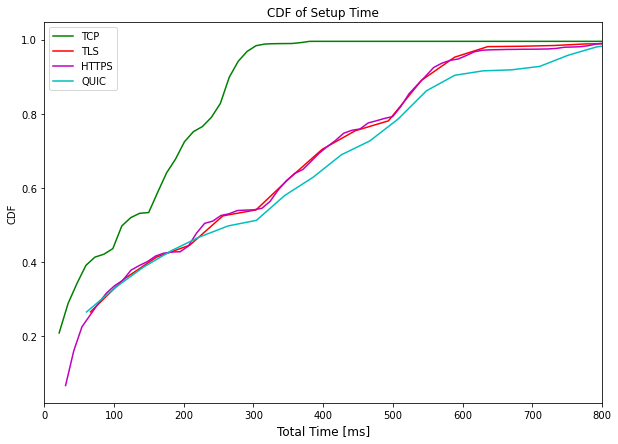

In [11]:
fig = plt.figure(figsize = (10, 7))
# plt.plot(calculateCDF(udpSetupTime)[0], calculateCDF(udpSetupTime)[1], label="UDP")
plt.plot(calculateCDF(tcpSetupTime)[0], calculateCDF(tcpSetupTime)[1], label="TCP", color = Colors.tcp)
plt.plot(calculateCDF(tlsSetupTime)[0], calculateCDF(tlsSetupTime)[1], label="TLS", color = Colors.tls)
plt.plot(calculateCDF(httpsSetupTime)[0], calculateCDF(httpsSetupTime)[1], label="HTTPS", color = Colors.https)
plt.plot(calculateCDF(quicSetupTime)[0], calculateCDF(quicSetupTime)[1], label="QUIC", color = Colors.quic)
plt.xlim([0, 800])

plt.title("CDF of Setup Time")
plt.xlabel("Total Time [ms]", fontsize = 12)
plt.ylabel("CDF")

plt.legend()

plt.show()